In [19]:
from ultralytics import YOLO
import os
import sys
import time
from PIL import Image
import torchvision
import json
import numpy as np
import zipfile
import cv2
import matplotlib.pyplot as plt

In [20]:
# model = YOLO("best.pt").cuda()  # load a pretrained model (recommended for training)
model = YOLO("runs/detect/train_8n_with_background/weights/best.pt").cuda()  # load a pretrained model (recommended for training)
# # Use the model

# transform = torchvision.transforms.Compose([
#     torchvision.transforms.CenterCrop((640,640)),
#     torchvision.transforms.Resize((640,640)),
#     torchvision.transforms.ToTensor(),
#     # torchvision.transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
# ])

In [21]:
test_path = 'datasets/test'

for fname in os.listdir(test_path):
    img_path = os.path.join(test_path,fname)
    # img_path = 'datasets/yolo_dataset/images/pesudo/train/65.png'
    img_path = 'datasets/test/6.png'
    
    # img = Image.open(img_path)
    # img = transform(img)
    # img = img.to('cuda').unsqueeze(0)
    
    result = model(img_path)[0]
    
    boxes = result.boxes

    pred = []
    for i in range(len(boxes.cls)):
        x_center,y_center,w,h = boxes.xywh[i].detach().cpu()
        
        x = x_center - w/2
        y = y_center - h/2
        
        box = np.array([x, y, w, h], dtype=np.int64).tolist()
        
        result_dict= {
            'image_id' : int(fname.replace('.png','')),
            'category_id' : int(boxes.cls[i]),
            'bbox' : box,
            'score' : float(boxes.conf[i])
        }
        pred.append(result_dict)
    break
print(len(pred))


image 1/1 /workspace/24CV/final/datasets/test/6.png: 352x640 2 2s, 1 4, 2 11s, 2 12s, 1 13, 4.7ms
Speed: 0.7ms preprocess, 4.7ms inference, 0.7ms postprocess per image at shape (1, 3, 352, 640)
8


In [22]:
import random
print(random.choice(range(255)))
color = [[random.choice(range(255))for _ in range(3)] for _ in range(15)] 
print(color)
print(color[1][1])


196
[[237, 180, 90], [216, 237, 9], [21, 229, 155], [221, 190, 138], [155, 151, 217], [220, 210, 124], [243, 238, 144], [82, 17, 140], [68, 20, 51], [204, 10, 56], [248, 30, 243], [106, 208, 195], [45, 14, 163], [212, 141, 183], [27, 162, 51]]
237


In [23]:
print(boxes)

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([ 4., 12., 12., 11.,  2., 11.,  2., 13.], device='cuda:0')
conf: tensor([0.9891, 0.9520, 0.9082, 0.8967, 0.8341, 0.6712, 0.2842, 0.2740], device='cuda:0')
data: tensor([[2.9722e+01, 1.4218e+02, 1.6569e+02, 3.0154e+02, 9.8908e-01, 4.0000e+00],
        [4.5607e+02, 5.3770e+01, 5.0759e+02, 2.3632e+02, 9.5204e-01, 1.2000e+01],
        [4.6099e+02, 2.6186e+02, 4.9515e+02, 3.2030e+02, 9.0815e-01, 1.2000e+01],
        [3.2208e+02, 7.3198e+01, 4.0234e+02, 2.0887e+02, 8.9669e-01, 1.1000e+01],
        [2.0421e+02, 9.9153e+01, 2.7527e+02, 1.9416e+02, 8.3410e-01, 2.0000e+00],
        [3.5663e+02, 2.8054e+02, 3.8373e+02, 2.9064e+02, 6.7124e-01, 1.1000e+01],
        [2.1502e+02, 2.1785e+02, 2.4545e+02, 2.4295e+02, 2.8419e-01, 2.0000e+00],
        [4.2595e-02, 2.8915e+02, 5.7803e+01, 3.4255e+02, 2.7400e-01, 1.3000e+01]], device='cuda:0')
id: None
is_track: False
orig_shape: (345, 640)
shape: torch.Size([8, 6])
xywh: tensor([[ 97.70

W, H : (640, 345)
(345, 640, 3)
29 142 164 301
456 53 507 235
460 261 494 319
322 73 402 208
204 99 275 194
356 280 383 290
215 217 245 242
0 289 57 342


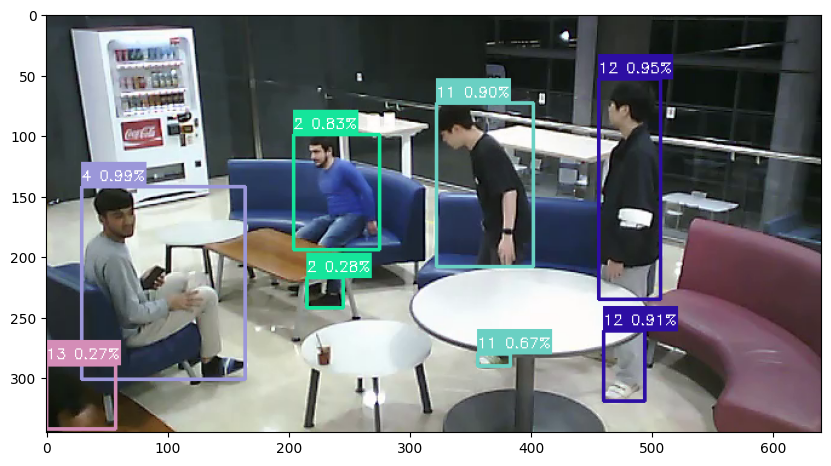

In [24]:

# 이미지 로드
image = Image.open(img_path)
W, H = image.size
print(f"W, H : {W, H}")

image = np.array(image)
print(image.shape)
for i, p in enumerate(pred):
    box = p['bbox']
    id = p['category_id']#+1
    prob = p['score']
    x, y , w, h = box
    x = int(x)
    y = int(y)
    x_end = int(x+w)
    y_end = int(y+h)
    
    # x, y, x_end, y_end = box
    
    # x, y , x_end, y_end = np.array(boxes.xyxy[i].detach().cpu().numpy(), dtype=np.int64)
    print(x,y,x_end,y_end)
    cv2.rectangle(image, (x, y), (x_end, y_end), color[id], 2)  # (0, 255, 0)은 색상, 2는 선의 두께
    # Finds space required by the text so that we can put a background with that amount of width.
    (w, h), _ = cv2.getTextSize(
            f"{id} {prob:.2f}%", cv2.FONT_HERSHEY_SIMPLEX, 0.4, 1)

    # Prints the text.    
    image = cv2.rectangle(image, (x, y - 20), (x + w, y), color[id], -1)
    image = cv2.putText(image, f"{id} {prob:.2f}%", (x, y - 5),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.4, (255,255,255), 1)

    # # For printing text
    # img = cv2.putText(img, 'test', (x1, y1),
    #                     cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255,255,255), 1)

# 이미지 보여주기
plt.figure(figsize=(10,10))
plt.imshow(image)